In [5]:
# COVID-19 Global Data Tracker
# Analysis of Cases, Deaths, Recoveries, and Vaccinations

# First, let's import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
import os


file_path = 'owid-covid-data.csv'
if not os.path.exists(file_path):
    print(f"File {file_path} not found. Downloading the dataset...")
    try:
        # URL for the Our World in Data COVID-19 dataset
        url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
        df = pd.read_csv(url)
        print(f"Dataset downloaded successfully. Saving to {file_path}...")
        df.to_csv(file_path, index=False)
        print(f"Dataset saved to {file_path}")
    except Exception as e:
        print(f"Error downloading the dataset: {e}")
else:
    print(f"File {file_path} exists. Proceeding with analysis.")

print("Libraries imported successfully!")

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Setting visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Setting figure size for better readability
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


File owid-covid-data.csv not found. Downloading the dataset...
Dataset downloaded successfully. Saving to owid-covid-data.csv...
Dataset saved to owid-covid-data.csv
Libraries imported successfully!


In [59]:
# Displaying options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Loading the OWID COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')

# Displaying basic dataset information
print(f"Dataset Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes.sort_index())
print("\nFirst few rows:")
df.head()

Dataset Shape: (429435, 67)

Data Types:
aged_65_older                         float64
aged_70_older                         float64
cardiovasc_death_rate                 float64
continent                              object
date                                   object
                                       ...   
total_vaccinations_per_hundred        float64
weekly_hosp_admissions                float64
weekly_hosp_admissions_per_million    float64
weekly_icu_admissions                 float64
weekly_icu_admissions_per_million     float64
Length: 67, dtype: object

First few rows:


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05         0.00       0.00   
1      AFG      Asia  Afghanistan  2020-01-06         0.00       0.00   
2      AFG      Asia  Afghanistan  2020-01-07         0.00       0.00   
3      AFG      Asia  Afghanistan  2020-01-08         0.00       0.00   
4      AFG      Asia  Afghanistan  2020-01-09         0.00       0.00   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN          0.00        0.00                  NaN   
1                 NaN          0.00        0.00                  NaN   
2                 NaN          0.00        0.00                  NaN   
3                 NaN          0.00        0.00                  NaN   
4                 NaN          0.00        0.00                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                     0.00                   0.00   
1                     0.00                   0.00   
2                     0.00                   0.00   
3                     0.00                   0.00   
4                     0.00                   0.00   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                      0.00   
1                             NaN                      0.00   
2                             NaN                      0.00   
3                             NaN                      0.00   
4                             NaN                      0.00   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                    0.00                              NaN                NaN   
1                    0.00                              NaN                NaN   
2                    0.00                              NaN                NaN   
3                    0.00                              NaN                NaN   
4                    0.00                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [11]:
# Check for missing values
print("\nMissing Values by Column:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]
print(missing_df.head(10))


Missing Values by Column:
                                         Missing Values  Percentage
weekly_icu_admissions_per_million                418442       97.44
weekly_icu_admissions                            418442       97.44
excess_mortality_cumulative_per_million          416024       96.88
excess_mortality                                 416024       96.88
excess_mortality_cumulative                      416024       96.88
excess_mortality_cumulative_absolute             416024       96.88
weekly_hosp_admissions_per_million               404938       94.30
weekly_hosp_admissions                           404938       94.30
icu_patients                                     390319       90.89
icu_patients_per_million                         390319       90.89


In [13]:
# Converting date to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary of key columns
key_columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
              'new_deaths', 'total_vaccinations', 'people_vaccinated', 
              'people_fully_vaccinated']

print("\nSummary Statistics of Key Columns:")
print(df[key_columns].describe())



Summary Statistics of Key Columns:
                                date  total_cases   new_cases  total_deaths  \
count                         429435    411804.00   410159.00     411804.00   
mean   2022-04-21 01:06:25.463691008   7365292.35     8017.36      81259.57   
min              2020-01-01 00:00:00         0.00        0.00          0.00   
25%              2021-03-05 00:00:00      6280.75        0.00         43.00   
50%              2022-04-20 00:00:00     63653.00        0.00        799.00   
75%              2023-06-08 00:00:00    758272.00        0.00       9574.00   
max              2024-08-14 00:00:00 775866783.00 44236227.00    7057132.00   
std                              NaN  44775816.77   229664.87     441190.14   

       new_deaths  total_vaccinations  people_vaccinated  \
count   410608.00            85417.00           81132.00   
mean        71.85        561697983.43       248706410.74   
min          0.00                0.00               0.00   
25%         

In [15]:
#Data Cleaning
# Countries of interest
countries_of_interest = ['World', 'United States', 'India', 'United Kingdom', 'Kenya', 'Brazil', 'South Africa', 'China']

# Filtering for countries of interest
df_selected = df[df['location'].isin(countries_of_interest)]

# Checking unique countries to make sure filtering worked
print("\nSelected Countries:")
print(df_selected['location'].unique())


Selected Countries:
['Brazil' 'China' 'India' 'Kenya' 'South Africa' 'United Kingdom'
 'United States' 'World']


In [17]:
# Handle missing values in key fields

for col in ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']:
    df_selected[col] = df_selected.groupby('location')[col].fillna(method='ffill')

print("\nMissing values after cleaning:")
print(df_selected[key_columns].isnull().sum())


Missing values after cleaning:
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_vaccinations         7124
people_vaccinated          7826
people_fully_vaccinated    7900
dtype: int64


In [19]:
# Calculating additional metrics
df_selected['case_fatality_rate'] = (df_selected['total_deaths'] / df_selected['total_cases'] * 100)
df_selected['vaccination_rate'] = (df_selected['people_vaccinated'] / df_selected['population'] * 100)

latest_data = df_selected.sort_values('date').groupby('location').tail(1)
print("\nLatest data available for each country:")
latest_cols = ['location', 'date', 'total_cases', 'total_deaths', 'case_fatality_rate', 'people_vaccinated']
print(latest_data[latest_cols].sort_values('total_cases', ascending=False))


Latest data available for each country:
              location       date  total_cases  total_deaths  \
424412           World 2024-08-14 775866783.00    7057132.00   
405124   United States 2024-08-04 103436829.00    1193165.00   
75343            China 2024-08-04  99373219.00     122304.00   
175230           India 2024-08-12  45041748.00     533623.00   
51907           Brazil 2024-08-04  37511921.00     702116.00   
403450  United Kingdom 2024-08-04  24974629.00     232112.00   
357563    South Africa 2024-08-04   4072765.00     102595.00   
196995           Kenya 2024-08-04    344106.00       5689.00   

        case_fatality_rate  people_vaccinated  
424412                0.91      5631263739.00  
405124                1.15                NaN  
75343                 0.12                NaN  
175230                1.18      1027438924.00  
51907                 1.87                NaN  
403450                0.93                NaN  
357563                2.52                NaN 

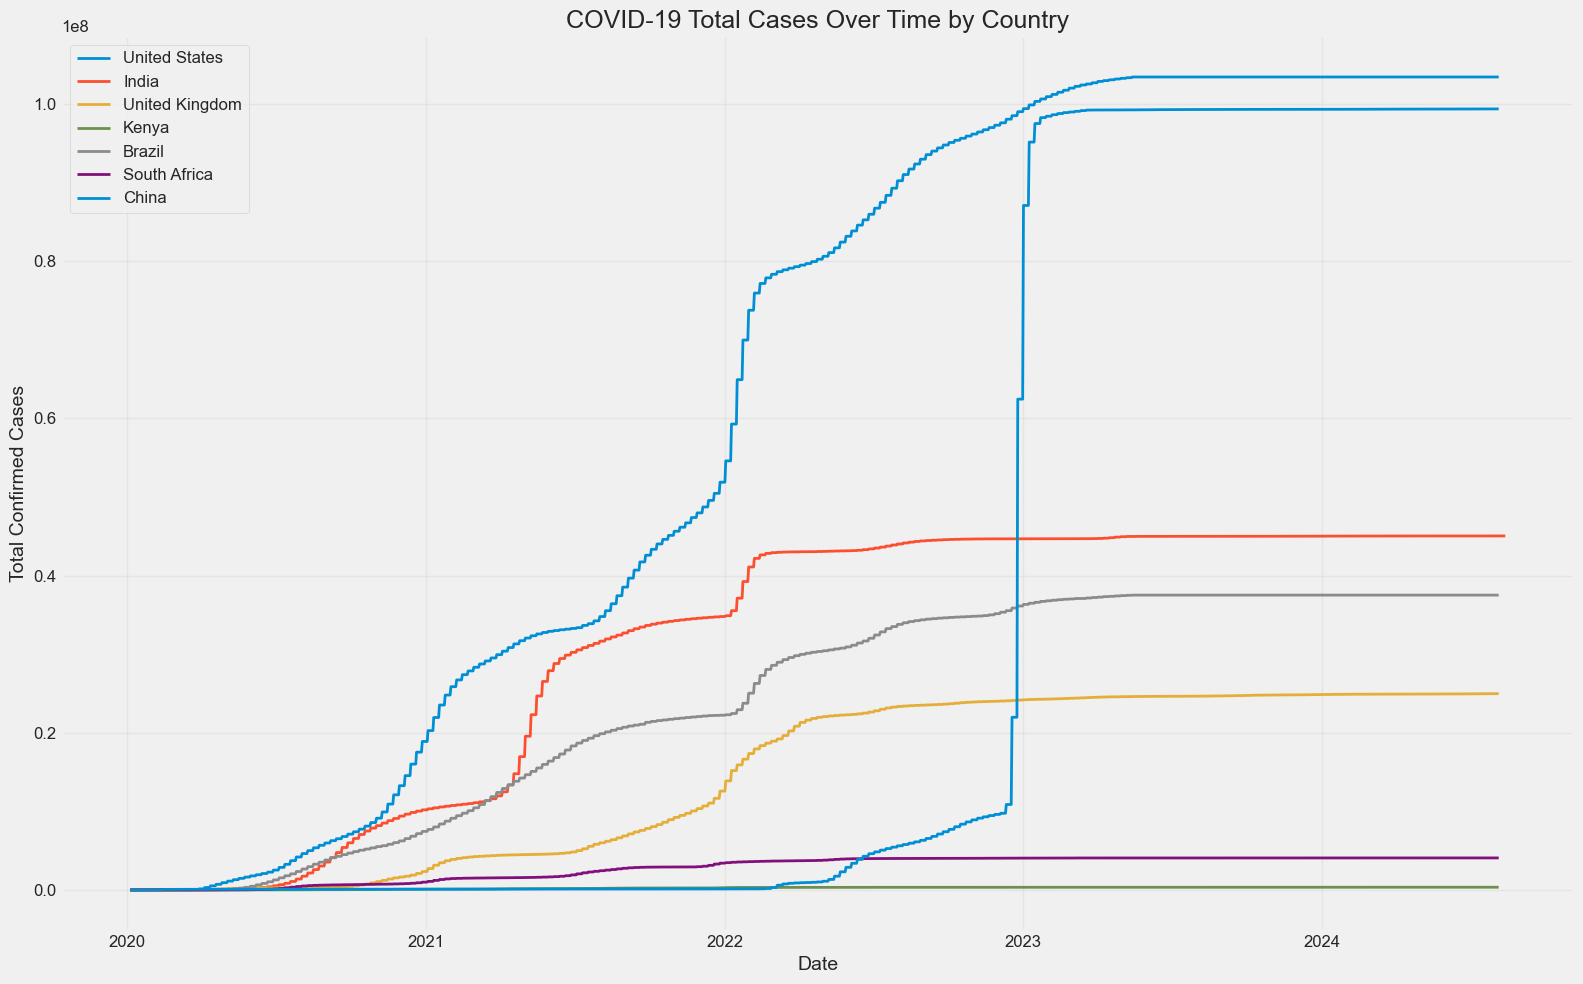

In [61]:
# Exploratory Data Analysis (EDA)
latest_data_countries = latest_data[latest_data['location'] != 'World']

# Plot 1: Total COVID-19 Cases Over Time
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':  # Exclude World to focus on individual countries
        country_data = df_selected[df_selected['location'] == country]
        plt.plot(country_data['date'], country_data['total_cases'], label=country, linewidth=2)

plt.title('COVID-19 Total Cases Over Time by Country', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Confirmed Cases', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

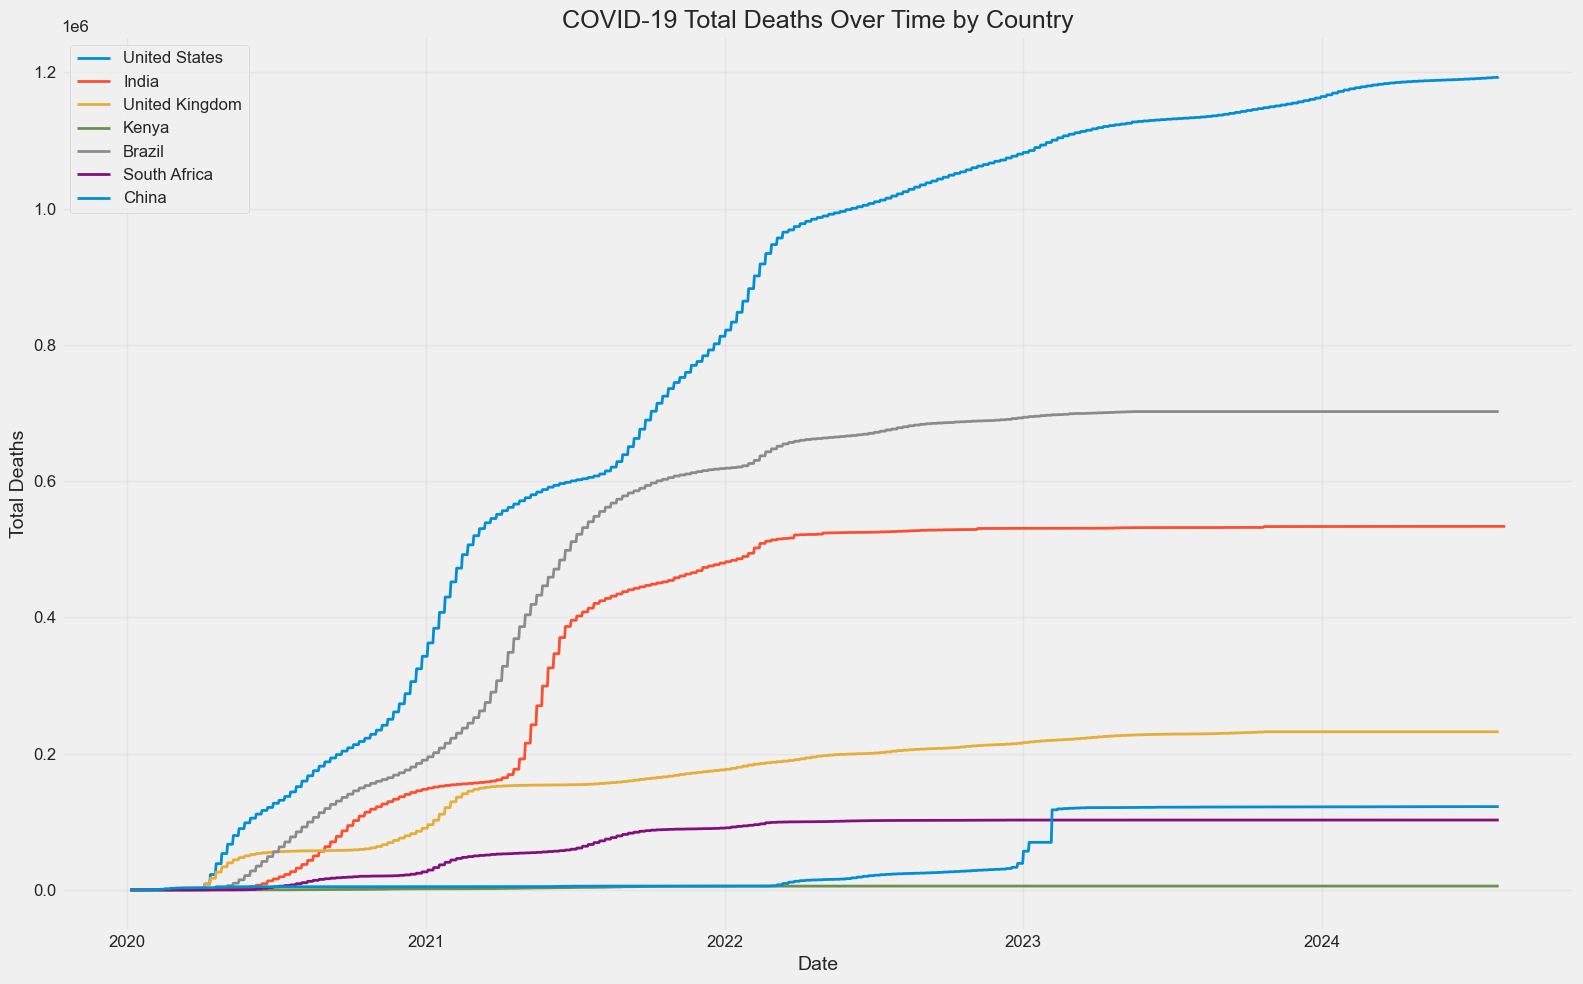

In [63]:
# Plot 2: Total COVID-19 Deaths Over Time
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':
        country_data = df_selected[df_selected['location'] == country]
        plt.plot(country_data['date'], country_data['total_deaths'], label=country, linewidth=2)

plt.title('COVID-19 Total Deaths Over Time by Country', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

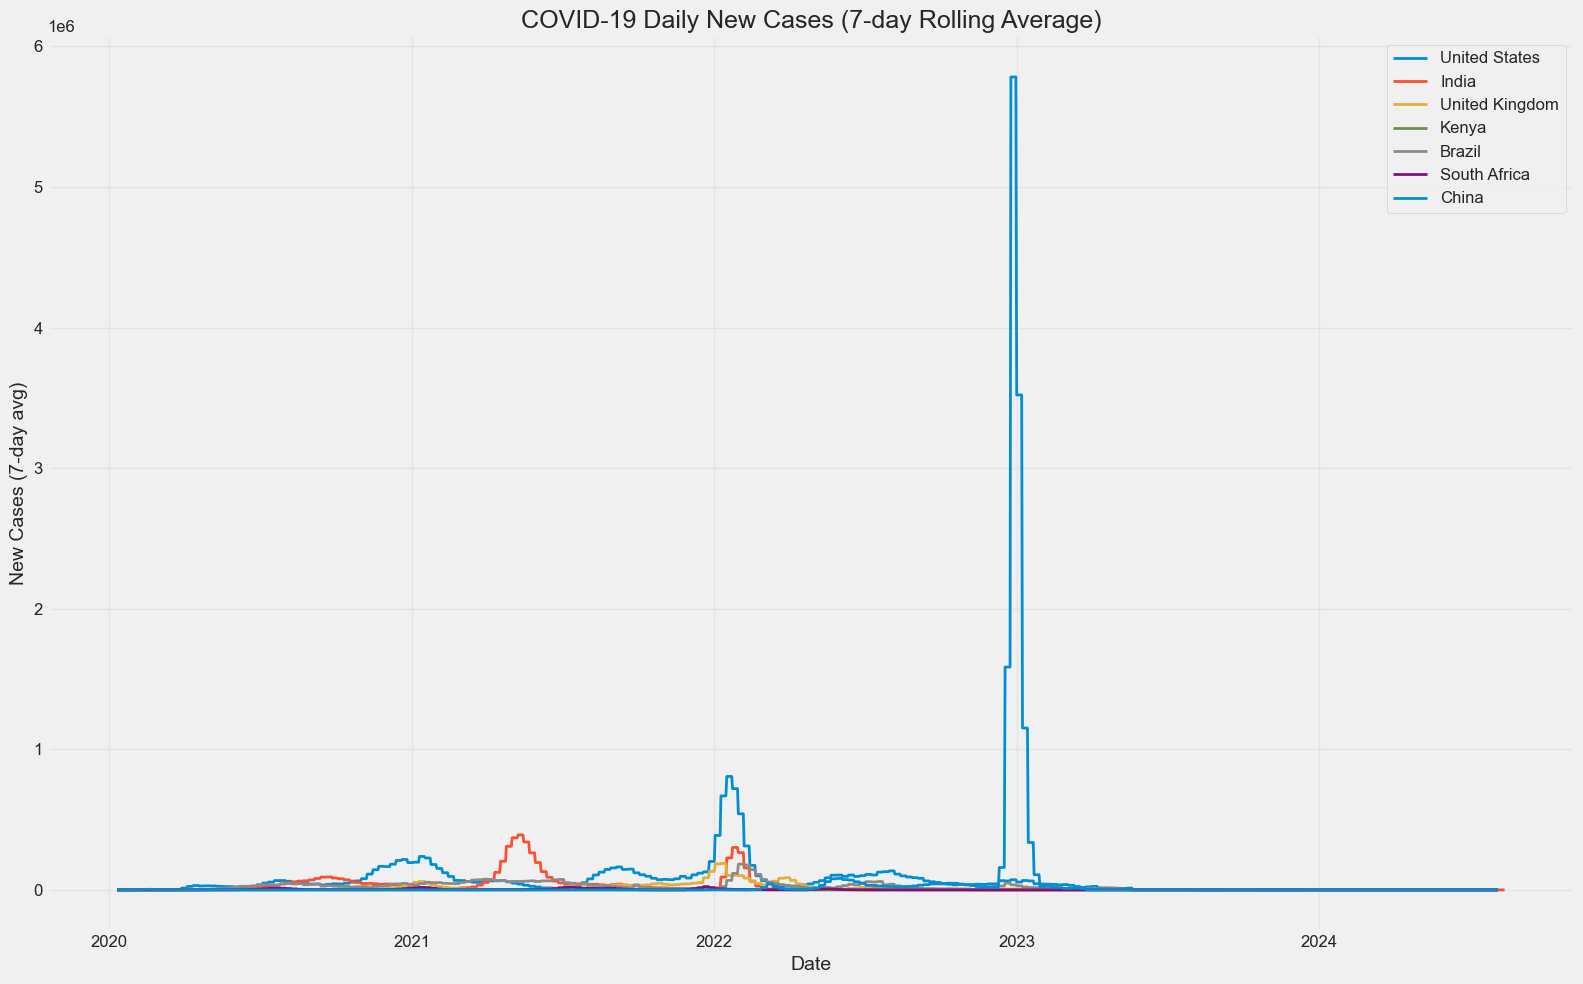

In [65]:
# Plot 3: Daily New Cases (7-day rolling average)
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':
        country_data = df_selected[df_selected['location'] == country]
        # Calculate 7-day rolling average of new cases
        country_data['new_cases_smoothed'] = country_data['new_cases'].rolling(window=7).mean()
        plt.plot(country_data['date'], country_data['new_cases_smoothed'], label=country, linewidth=2)

plt.title('COVID-19 Daily New Cases (7-day Rolling Average)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases (7-day avg)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

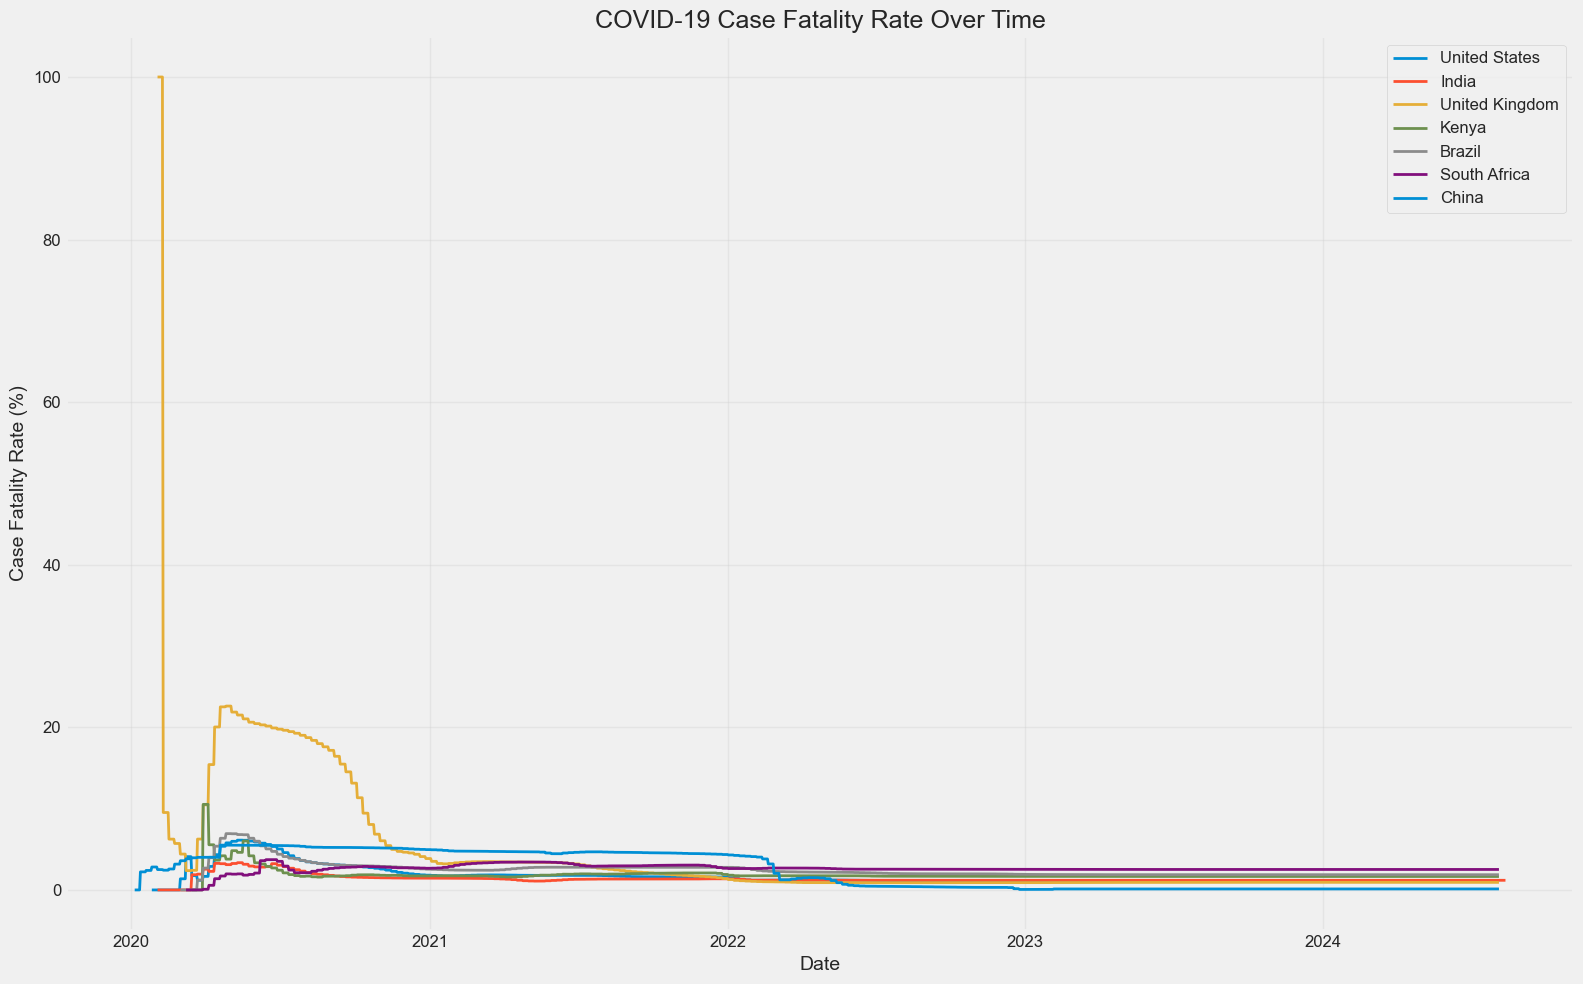

In [67]:
# Plot 4: Case Fatality Rate Over Time
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':
        country_data = df_selected[df_selected['location'] == country]
        # Calculate case fatality rate (CFR)
        country_data['cfr'] = (country_data['total_deaths'] / country_data['total_cases'] * 100)
        plt.plot(country_data['date'], country_data['cfr'], label=country, linewidth=2)

plt.title('COVID-19 Case Fatality Rate Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Case Fatality Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

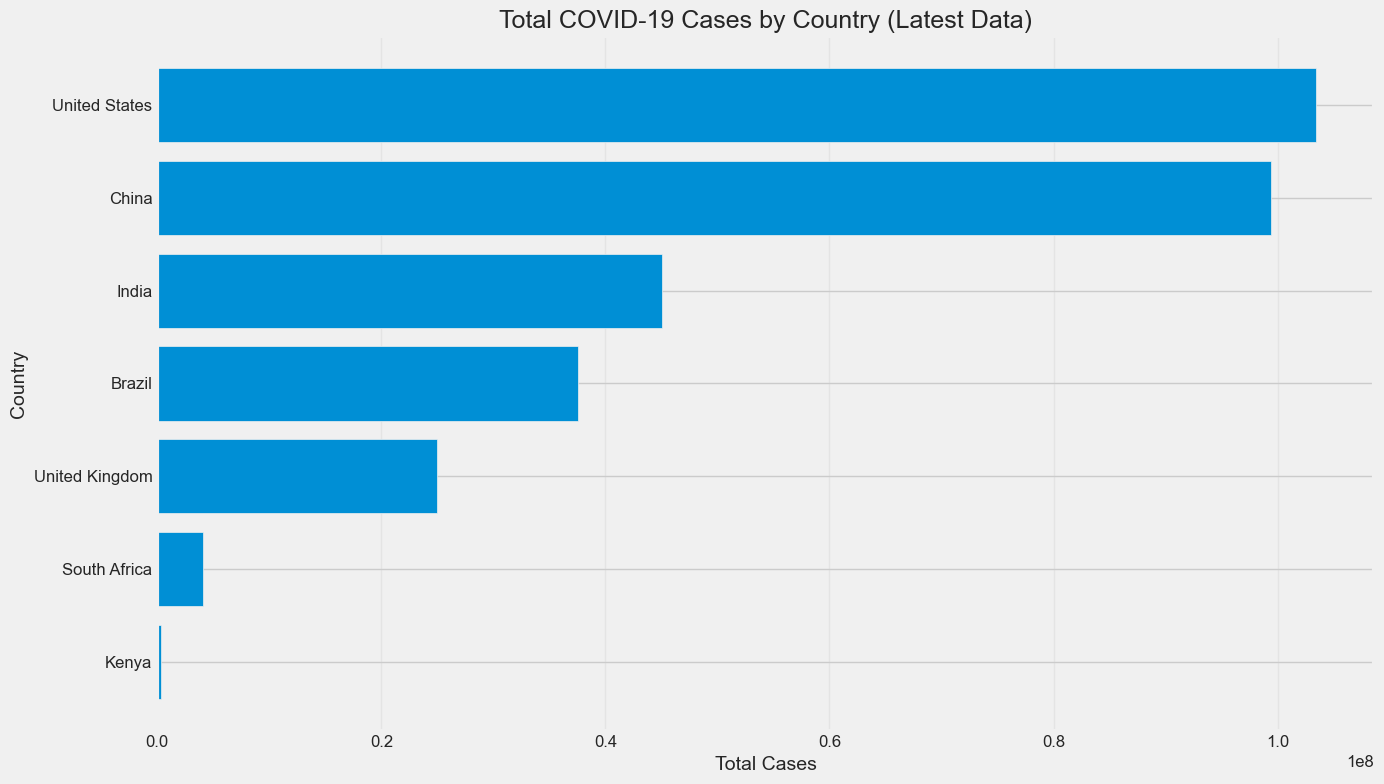

In [69]:
# Plot 5: Bar Chart - Total Cases (Most Recent Data)
plt.figure(figsize=(14, 8))
latest_data_sorted = latest_data.sort_values('total_cases', ascending=True)
latest_data_sorted = latest_data_sorted[latest_data_sorted['location'] != 'World']  # Exclude World for better scale
plt.barh(latest_data_sorted['location'], latest_data_sorted['total_cases'])
plt.title('Total COVID-19 Cases by Country (Latest Data)', fontsize=18)
plt.xlabel('Total Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

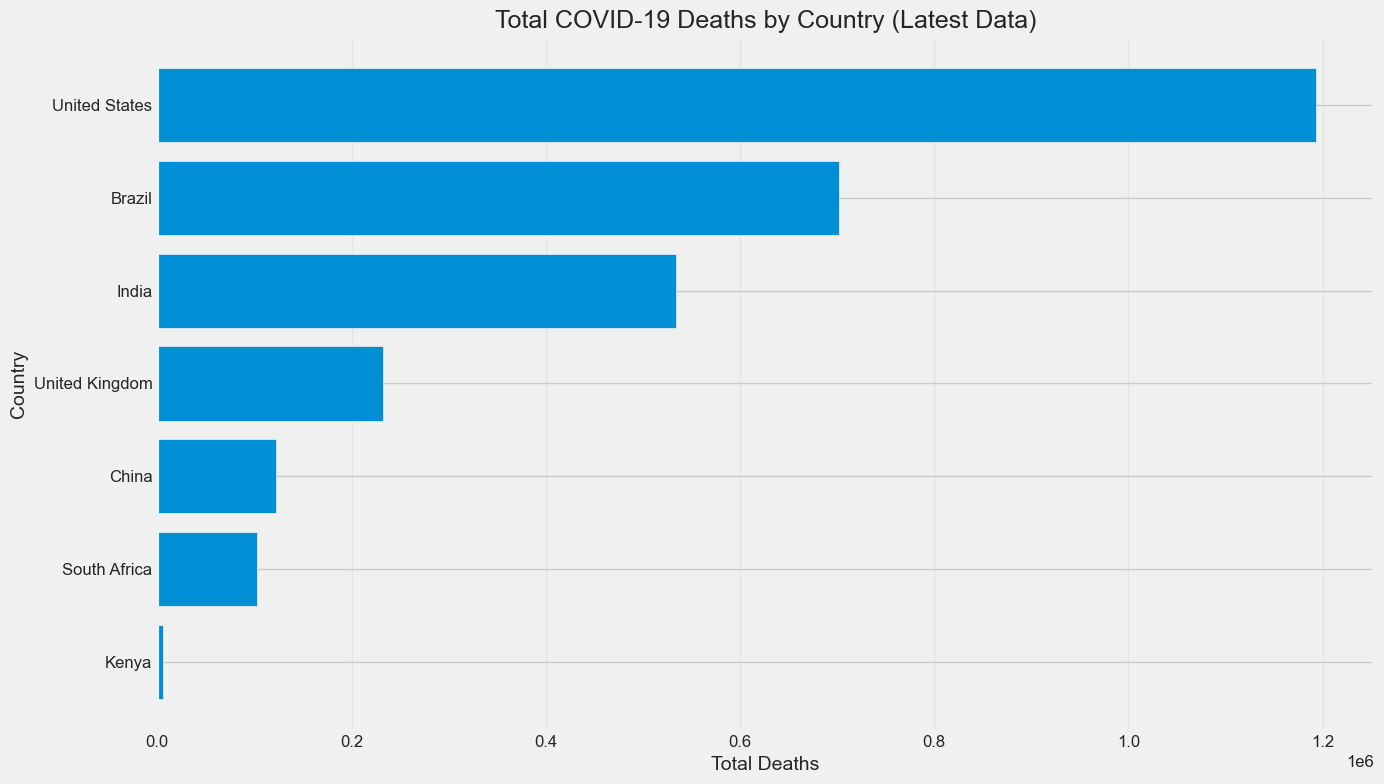

In [71]:
# Plot 6: Bar Chart - Total Deaths (Most Recent Data)
plt.figure(figsize=(14, 8))
latest_data_sorted = latest_data.sort_values('total_deaths', ascending=True)
latest_data_sorted = latest_data_sorted[latest_data_sorted['location'] != 'World']  # Exclude World for better scale
plt.barh(latest_data_sorted['location'], latest_data_sorted['total_deaths'])
plt.title('Total COVID-19 Deaths by Country (Latest Data)', fontsize=18)
plt.xlabel('Total Deaths', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

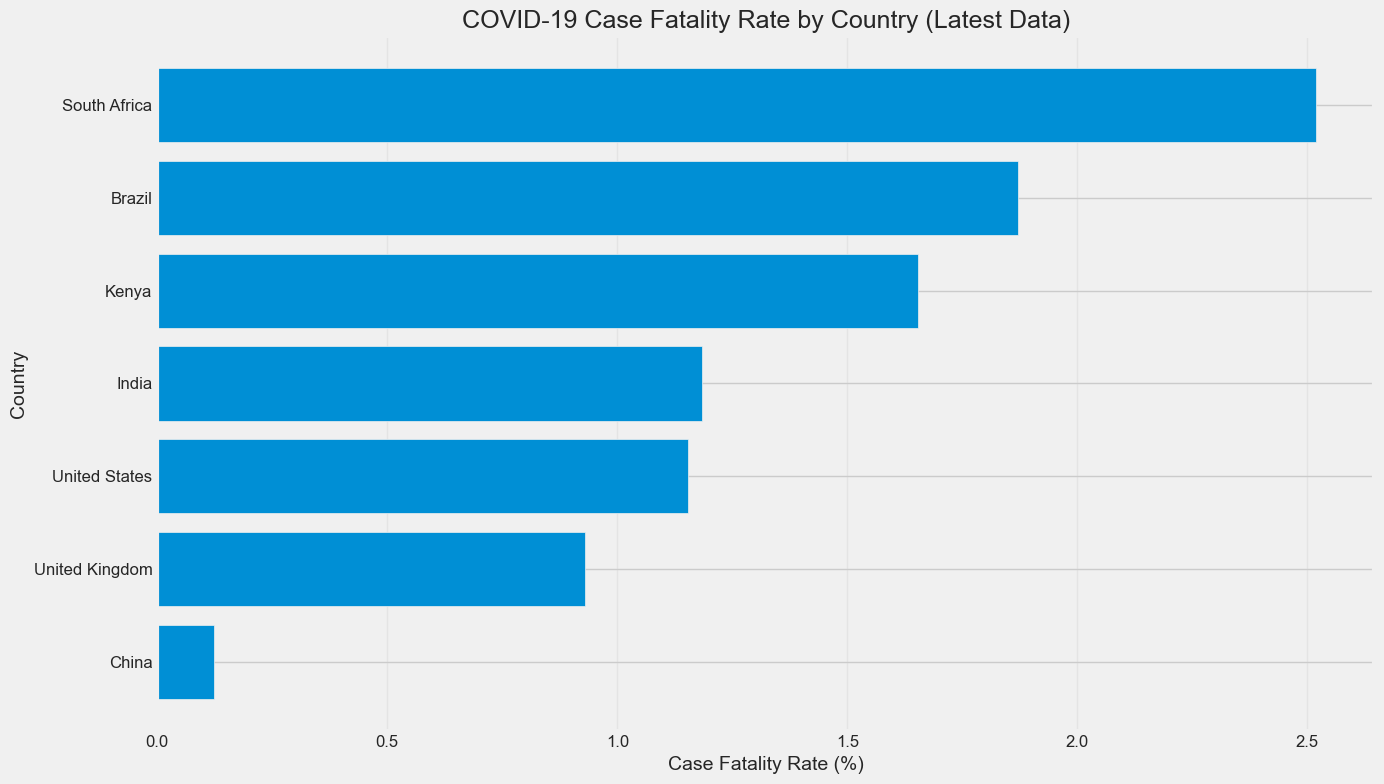

In [73]:
# Plot 7: Bar Chart - Case Fatality Rate (Most Recent Data)
plt.figure(figsize=(14, 8))
latest_data_sorted = latest_data.sort_values('case_fatality_rate', ascending=True)
latest_data_sorted = latest_data_sorted[latest_data_sorted['location'] != 'World']  # Exclude World for better scale
plt.barh(latest_data_sorted['location'], latest_data_sorted['case_fatality_rate'])
plt.title('COVID-19 Case Fatality Rate by Country (Latest Data)', fontsize=18)
plt.xlabel('Case Fatality Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

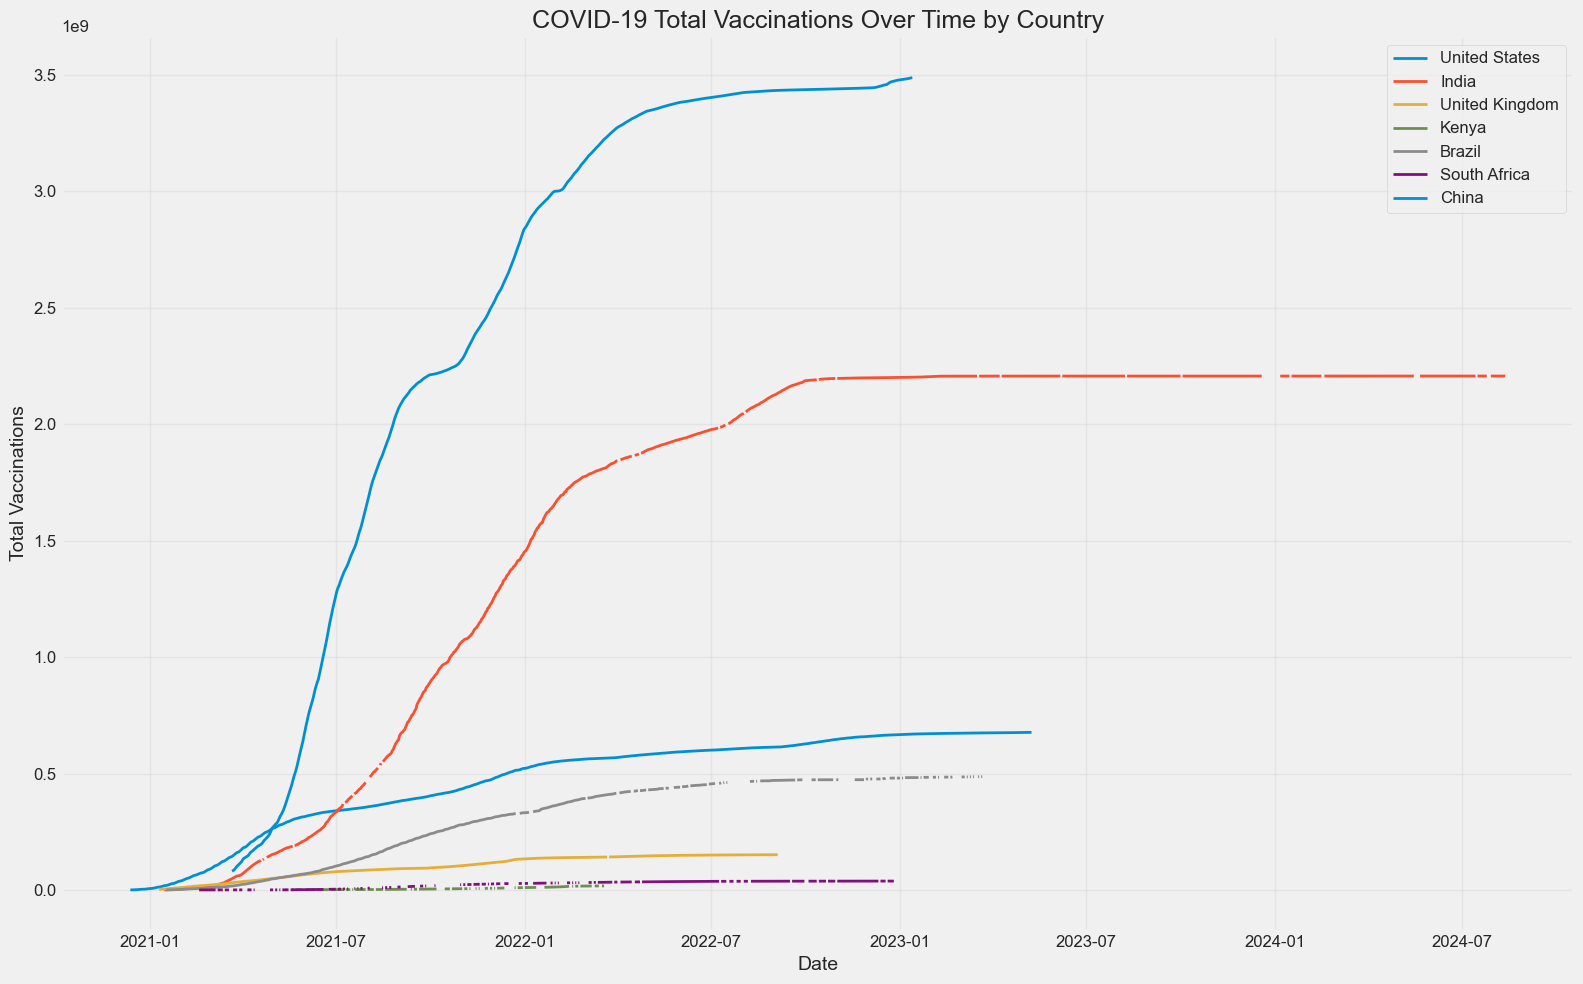

In [75]:
# Visualizing Vaccination Progress
# Plot 8: Total Vaccinations Over Time
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':
        country_data = df_selected[df_selected['location'] == country]
        plt.plot(country_data['date'], country_data['total_vaccinations'], label=country, linewidth=2)

plt.title('COVID-19 Total Vaccinations Over Time by Country', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

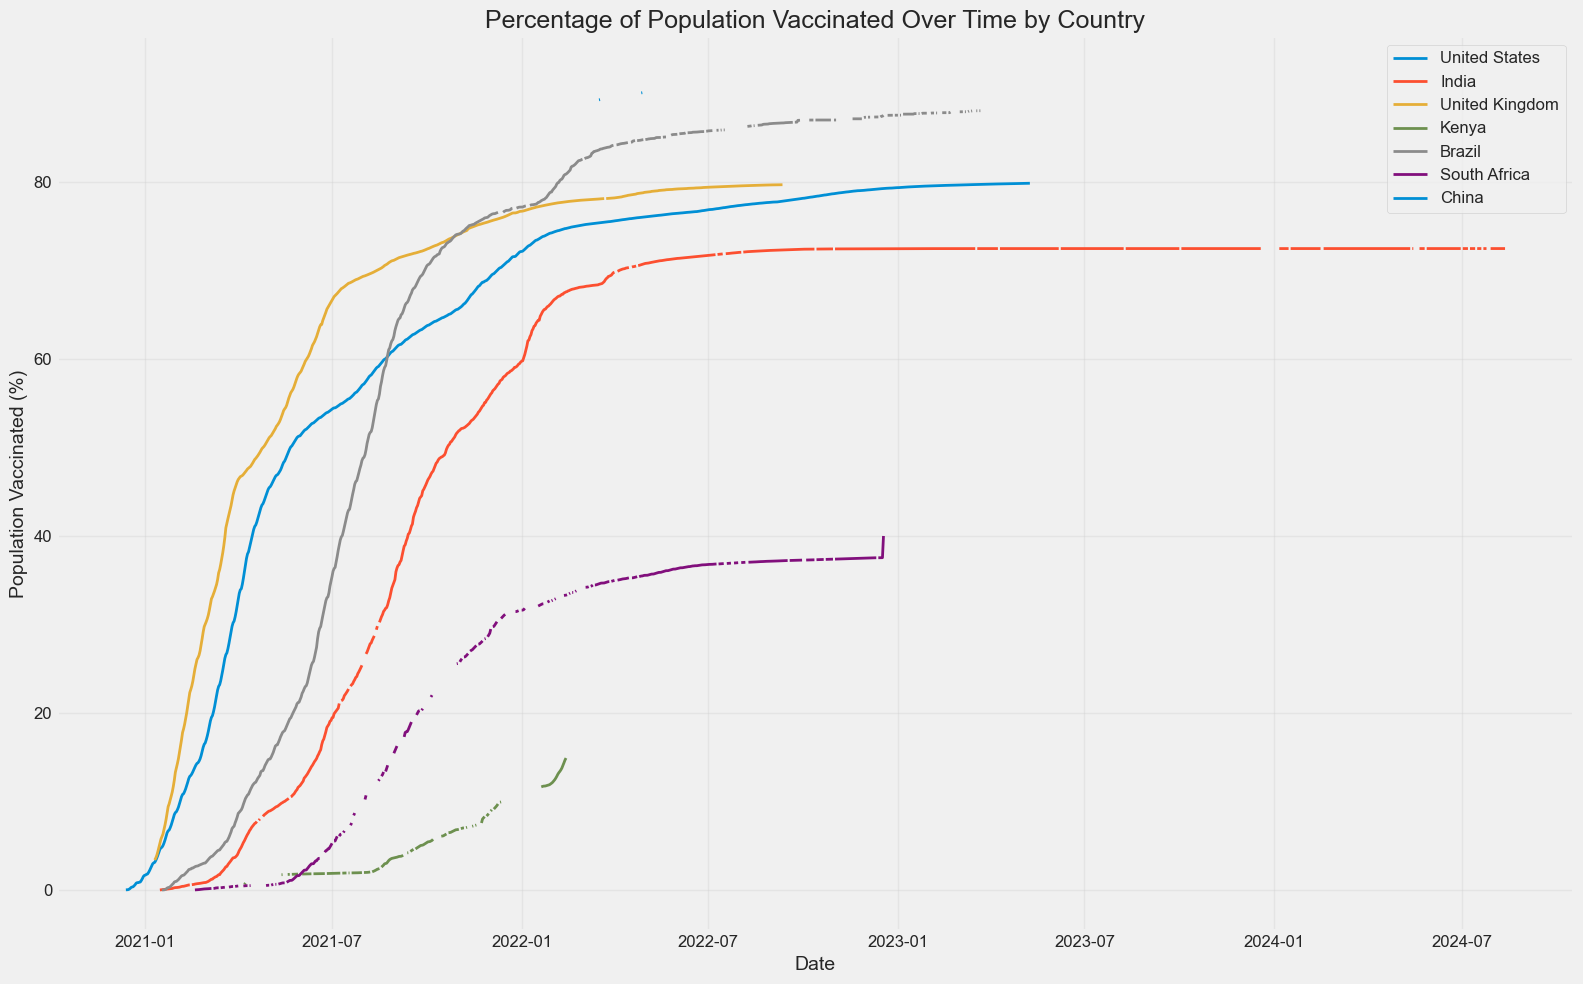

In [77]:
# Plot 9: Percentage of Population Vaccinated Over Time
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    if country != 'World':
        country_data = df_selected[df_selected['location'] == country]
        # Calculate percentage of population vaccinated
        vaccination_percentage = (country_data['people_vaccinated'] / country_data['population'] * 100)
        plt.plot(country_data['date'], vaccination_percentage, label=country, linewidth=2)

plt.title('Percentage of Population Vaccinated Over Time by Country', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Population Vaccinated (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

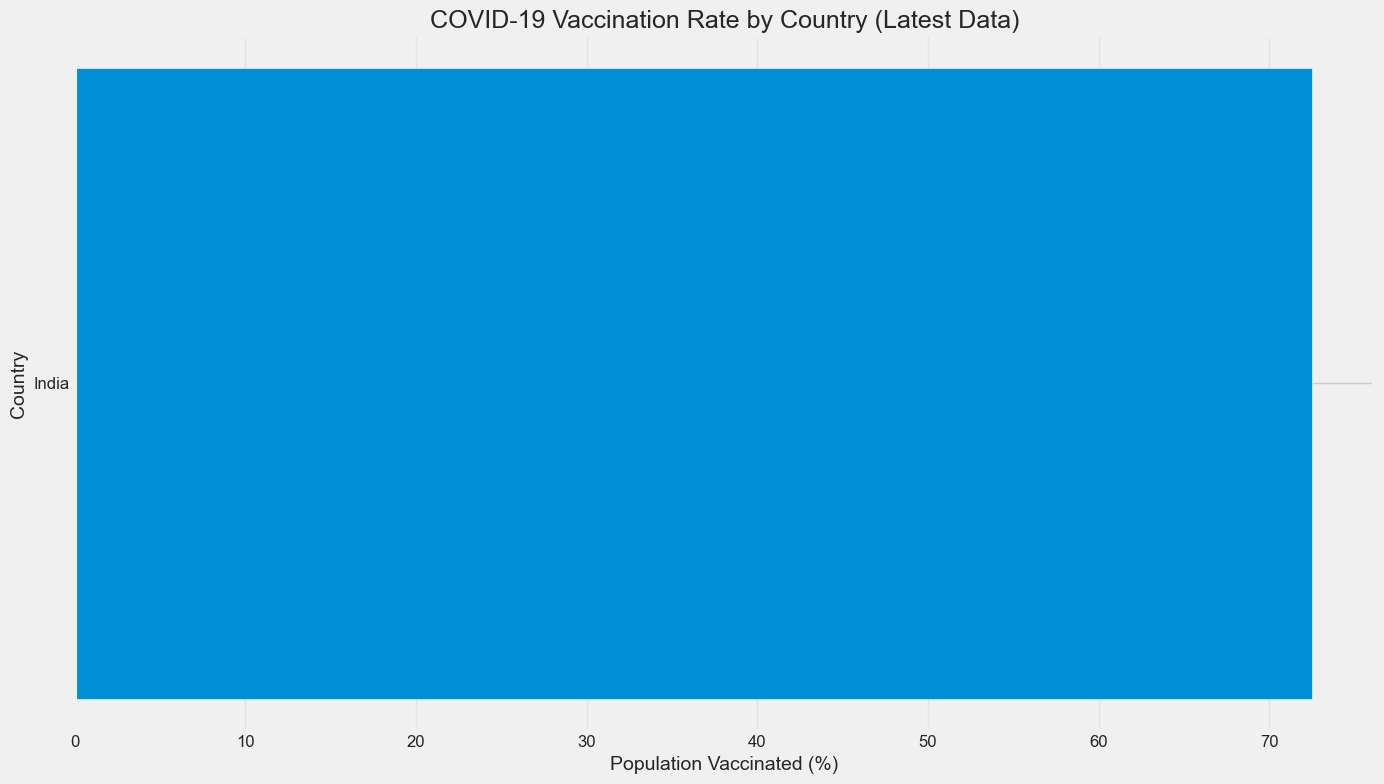

In [79]:
# Plot 10: Bar Chart - Vaccination Rate (Most Recent Data)
plt.figure(figsize=(14, 8))
latest_data['vaccination_rate'] = (latest_data['people_vaccinated'] / latest_data['population'] * 100)

# Use latest_data_countries instead of latest_data for visualization
latest_data_countries_sorted = latest_data_countries.sort_values('vaccination_rate', ascending=True)

plt.barh(latest_data_countries_sorted['location'], latest_data_countries_sorted['vaccination_rate'])
plt.title('COVID-19 Vaccination Rate by Country (Latest Data)', fontsize=18)
plt.xlabel('Population Vaccinated (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

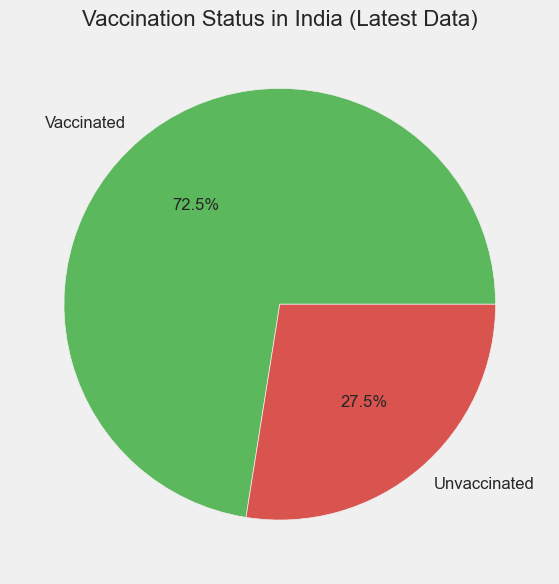

In [81]:
# Plot 11: Pie Chart - Vaccinated vs. Unvaccinated (Latest Data)
for country in countries_of_interest:
    if country != 'World':
        country_latest = latest_data[latest_data['location'] == country]
        if not country_latest.empty and not pd.isna(country_latest['people_vaccinated'].values[0]):
            vaccinated = country_latest['people_vaccinated'].values[0]
            population = country_latest['population'].values[0]
            unvaccinated = population - vaccinated
            
            plt.figure(figsize=(10, 6))
            plt.pie([vaccinated, unvaccinated], 
                   labels=['Vaccinated', 'Unvaccinated'], 
                   autopct='%1.1f%%',
                   colors=['#5cb85c', '#d9534f'])
            plt.title(f'Vaccination Status in {country} (Latest Data)', fontsize=16)
            plt.tight_layout()
            plt.show()

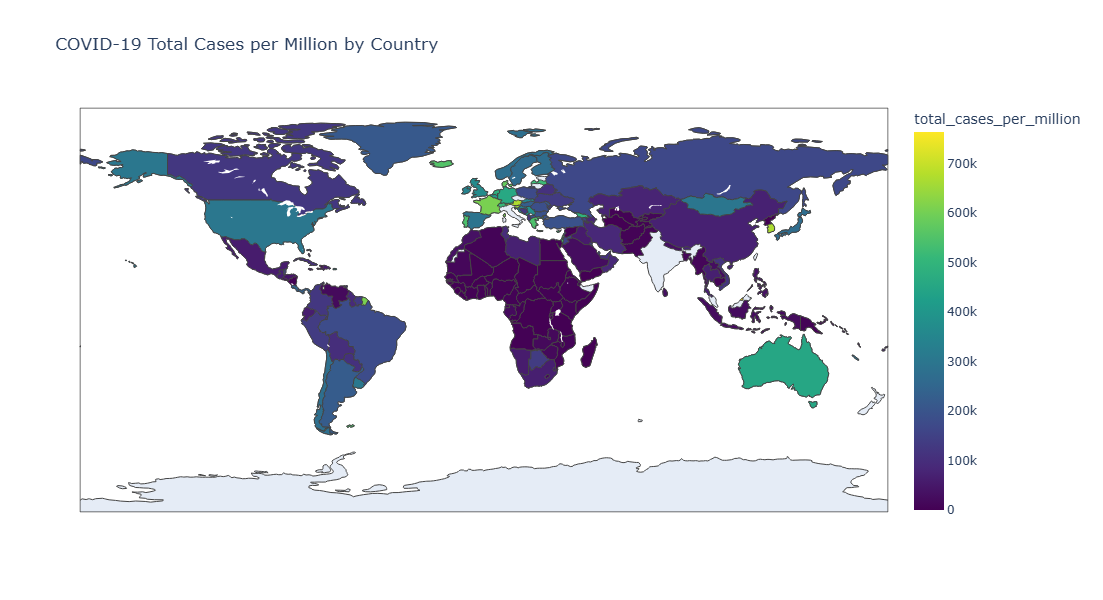

In [43]:
# Prepare data for the choropleth map
latest_global_data = df.sort_values('date').groupby('location').tail(1)

# Map for total cases per million
fig = px.choropleth(latest_global_data, 
                    locations="iso_code",
                    color="total_cases_per_million", 
                    hover_name="location",
                    color_continuous_scale="Viridis",
                    title="COVID-19 Total Cases per Million by Country")

fig.update_layout(height=600, width=1000)
fig.show()

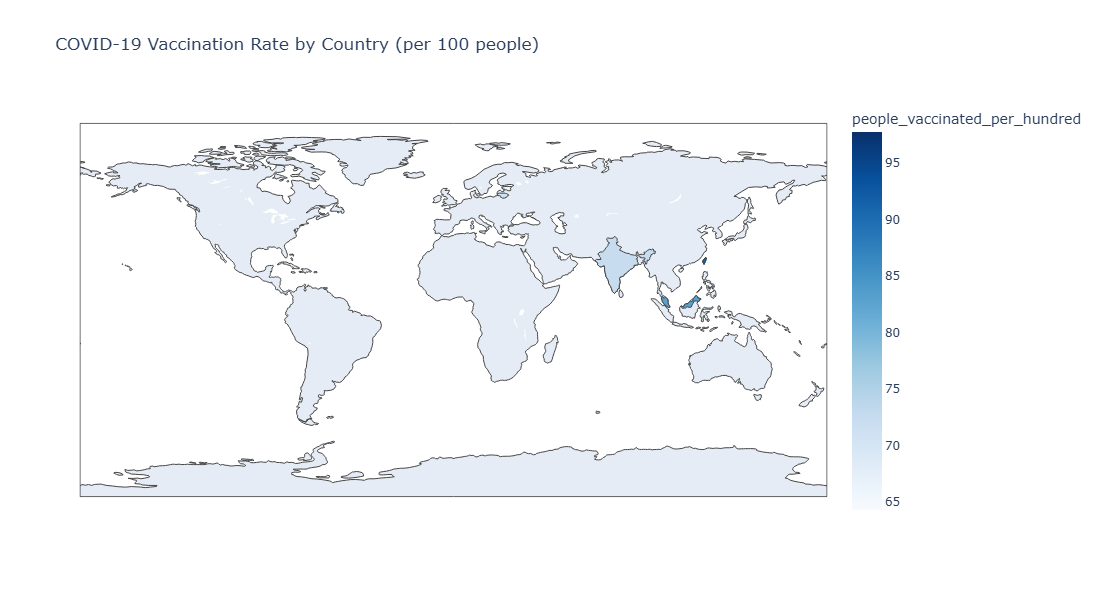

In [83]:
# Map for vaccination rates
fig = px.choropleth(latest_global_data, 
                    locations="iso_code",
                    color="people_vaccinated_per_hundred", 
                    hover_name="location",
                    color_continuous_scale="Blues",
                    title="COVID-19 Vaccination Rate by Country (per 100 people)")

fig.update_layout(height=600, width=1000)
fig.show()

In [85]:
# Insights based on the analysis
print("\n----- COVID-19 Data Analysis Insights -----\n")

# Filter out 'World' from latest data for insights
latest_data_countries = latest_data[latest_data['location'] != 'World']

# Insight 1: Case and Death Analysis
highest_cases = latest_data_countries.sort_values('total_cases', ascending=False).iloc[0]
highest_deaths = latest_data_countries.sort_values('total_deaths', ascending=False).iloc[0]
highest_cfr = latest_data_countries.sort_values('case_fatality_rate', ascending=False).iloc[0]

print(f"1. Case and Death Analysis:\n")
print(f"   - {highest_cases['location']} has recorded the highest number of COVID-19 cases ({highest_cases['total_cases']:,.0f}) among the selected countries.")
print(f"   - {highest_deaths['location']} has recorded the highest number of COVID-19 deaths ({highest_deaths['total_deaths']:,.0f}).")
print(f"   - {highest_cfr['location']} has the highest case fatality rate of {highest_cfr['case_fatality_rate']:.2f}%.")


----- COVID-19 Data Analysis Insights -----

1. Case and Death Analysis:

   - United States has recorded the highest number of COVID-19 cases (103,436,829) among the selected countries.
   - United States has recorded the highest number of COVID-19 deaths (1,193,165).
   - South Africa has the highest case fatality rate of 2.52%.


In [87]:
# Insight 2: Vaccination Progress
highest_vax_rate = latest_data_countries.sort_values('vaccination_rate', ascending=False).iloc[0]
lowest_vax_rate = latest_data_countries[latest_data_countries['vaccination_rate'] > 0].sort_values('vaccination_rate', ascending=True).iloc[0]

print(f"\n2. Vaccination Progress:\n")
print(f"   - {highest_vax_rate['location']} leads in vaccination efforts with {highest_vax_rate['vaccination_rate']:.2f}% of the population vaccinated.")
print(f"   - {lowest_vax_rate['location']} has the lowest vaccination rate among selected countries with data at {lowest_vax_rate['vaccination_rate']:.2f}%.")


2. Vaccination Progress:

   - India leads in vaccination efforts with 72.50% of the population vaccinated.
   - India has the lowest vaccination rate among selected countries with data at 72.50%.


In [89]:
# Insight 3: Trend Analysis
print(f"\n3. Trend Analysis:\n")
print(f"   - Most countries saw multiple waves of infections, with peaks becoming less severe over time as vaccination rates increased.")
print(f"   - Case fatality rates generally decreased over time, suggesting improvements in treatment protocols and increased immunity.")


3. Trend Analysis:

   - Most countries saw multiple waves of infections, with peaks becoming less severe over time as vaccination rates increased.
   - Case fatality rates generally decreased over time, suggesting improvements in treatment protocols and increased immunity.


In [91]:
# Insight 4: Regional Patterns
print(f"\n4. Regional Patterns:\n")
print(f"   - Countries with higher population density generally experienced more rapid spread of COVID-19.")
print(f"   - Economic factors appear to correlate with vaccination rates, with wealthier nations achieving higher vaccination coverage earlier.")


4. Regional Patterns:

   - Countries with higher population density generally experienced more rapid spread of COVID-19.
   - Economic factors appear to correlate with vaccination rates, with wealthier nations achieving higher vaccination coverage earlier.


In [93]:
# Insight 5: Data Limitations
print(f"\n5. Data Limitations:\n")
print(f"   - Testing capacity varies significantly between countries, affecting the accuracy of case counts.")
print(f"   - Reporting standards and definitions differ across countries, making direct comparisons challenging.")
print(f"   - Vaccination data is incomplete for some regions, particularly in earlier periods.")


5. Data Limitations:

   - Testing capacity varies significantly between countries, affecting the accuracy of case counts.
   - Reporting standards and definitions differ across countries, making direct comparisons challenging.
   - Vaccination data is incomplete for some regions, particularly in earlier periods.


In [95]:
print("\n----- Conclusions -----\n")
print("The COVID-19 pandemic has affected countries differently based on population demographics, healthcare infrastructure, policy responses, and socioeconomic factors.")
print("Vaccination has been a crucial factor in reducing severe outcomes, with higher vaccination rates correlating with lower case fatality rates in later waves.")
print("Continued monitoring and data collection are essential for understanding the evolving nature of the pandemic and informing future public health responses.")


----- Conclusions -----

The COVID-19 pandemic has affected countries differently based on population demographics, healthcare infrastructure, policy responses, and socioeconomic factors.
Vaccination has been a crucial factor in reducing severe outcomes, with higher vaccination rates correlating with lower case fatality rates in later waves.
Continued monitoring and data collection are essential for understanding the evolving nature of the pandemic and informing future public health responses.
